### LABORATORIO 6

In [1]:
import pandas as pd
import numpy as np
from typing import List, Callable, Any
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import scipy.optimize as opt
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### UPLOAD Y SEPARACION DE DATA

In [2]:
x = pd.read_csv('/Users/maria/OneDrive/Documentos/mle_laboratorios/Lab6/Lab6/wine_data.csv',
                names=["1", "2", "3", "4","5", "6", "7", "8","9", "10", "11", "12", "13","14"])

print(type(x), x.shape)

<class 'pandas.core.frame.DataFrame'> (178, 14)


In [3]:
x.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


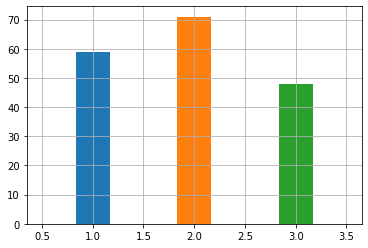

In [4]:
#visualizacion datos de cada tipo de vino
x.groupby('1')['1'].hist(bins=3)
plt.show()

In [5]:
#Separacion de dataset en variable dependiente e independientes
Y = x['1']
X = x.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13]]
print(X.shape, Y.shape)

(178, 13) (178,)


In [6]:
X.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
sc = StandardScaler()
est = sc.fit_transform(X)
est = pd.DataFrame(est)

In [8]:
est.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [9]:
est = pd.concat([pd.Series(1, index = est.index, name = '13'), est], axis=1)
print(type(est), est.shape)

<class 'pandas.core.frame.DataFrame'> (178, 14)


In [10]:
Y_procesado = np.array(Y)
Y_procesado = Y_procesado.reshape(178,1)
X_procesado = np.array(est)

m,n = X_procesado.shape
print(X_procesado.shape, Y_procesado.shape)

(178, 14) (178, 1)


In [11]:
x_train, x_test = train_test_split(X_procesado, test_size=0.33)
y_train, y_test = train_test_split(Y_procesado, test_size=0.33)

In [12]:
theta_0 = np.random.rand(n, 1)
theta_0.shape

(14, 1)

### FUNCIONES

In [13]:
sigmoid = lambda z: 1.0 / (1 + np.exp(-z))

In [14]:
def linear_cost(X, y, theta, lmbd):
    h = sigmoid(X @ theta)
    reg = (lmbd / (2 * len(X))) * (theta[1:] ** 2).sum()
    return ((h - y) ** 2).sum() / (2 * len(X)) + reg

In [15]:
def linear_cost_gradient(X, y, theta, lmbd):
    h = sigmoid(X @ theta)
    theta_copy = theta.copy()
    theta_copy[0] = 0
    reg_prime = lmbd * theta_copy / len(X)
    return ((X.T @ (h - y)) / len(X)) + reg_prime

In [16]:
def gradient_descent(
    X, 
    y,
    theta_0,
    cost_function, 
    cost_function_gradient,
    lmbd, 
    learning_rate = 0.01, 
    threshold = 0.001, 
    max_iter = 10000
):
    theta = theta_0
    iteration = 0
    costs = []
    thetas = []

    while np.linalg.norm(cost_function_gradient(X, y, theta, lmbd)) > threshold and iteration < max_iter: 
        iteration = iteration + 1
        theta = theta - (learning_rate * cost_function_gradient(X, y, theta, lmbd))
        costs.append(cost_function(X, y, theta, lmbd))
        thetas.append(theta.copy())
    
    return(theta, costs, thetas)

### TEST FUNCIONES

In [17]:
t, c, ts = gradient_descent(
    x_train, 
    y_train,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.001, 
    threshold = 0.1, 
    max_iter = 10000
)

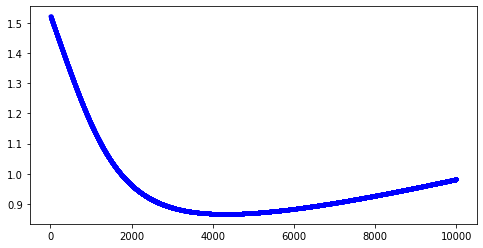

In [18]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(10000),c,'b.')

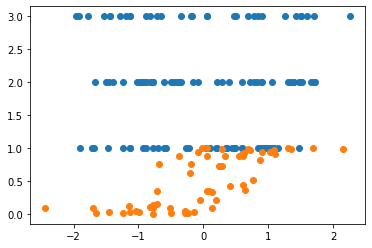

In [19]:
pred = sigmoid(x_test @ theta_0)
plt.figure()
plt.scatter(x=x_train[:,1],y= y_train)          
plt.scatter(x=x_test[:,1], y=pred)
plt.show()

### SUBSPLIT TIPO DE VINO 

In [20]:
Y0 = (Y_procesado == 1) * 1
Y1 = (Y_procesado == 2) * 1
Y2 = (Y_procesado == 3) * 1
print(Y0.sum(), Y1.sum(), Y2.sum())

59 71 48


### GRADO 1
#### CATEGORIA 1

In [21]:
y_train0, y_test0 = train_test_split(Y0, test_size=0.33)

t0, c0, ts0 = gradient_descent(
    x_train, 
    y_train0,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.001, 
    threshold = 0.1, 
    max_iter = 10000
)

In [22]:
print("El minimo del descenso es: ", min(c0))

El minimo del descenso es:  0.13177627968260625


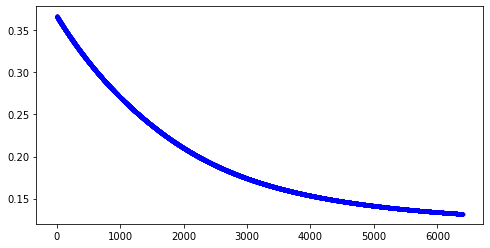

In [24]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(6398),c0,'b.')

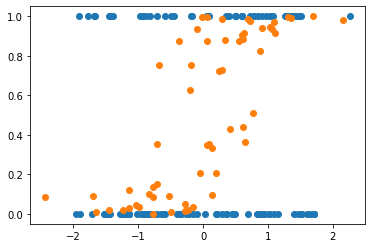

In [25]:
plt.figure()
plt.scatter(x=x_train[:,1],y= y_train0)          
plt.scatter(x=x_test[:,1], y=pred)
plt.show()

#### CATEGORIA 2

In [26]:
y_train1, y_test1 = train_test_split(Y1, test_size=0.33)

t1, c1, ts1 = gradient_descent(
    x_train, 
    y_train1,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.001, 
    threshold = 0.1, 
    max_iter = 10000
)

In [27]:
print("El minimo del descenso es: ", min(c1))

El minimo del descenso es:  0.13268763119237195


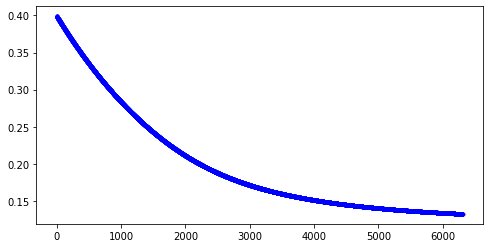

In [29]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(6312),c1,'b.')

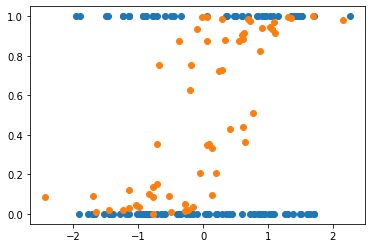

In [30]:
plt.figure()
plt.scatter(x=x_train[:,1],y= y_train1)          
plt.scatter(x=x_test[:,1], y=pred)
plt.show()

#### CATEGORIA 3

In [31]:
y_train2, y_test2 = train_test_split(Y2, test_size=0.33)

t2, c2, ts2 = gradient_descent(
    x_train, 
    y_train2,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.001, 
    threshold = 0.1, 
    max_iter = 10000
)

In [32]:
print("El minimo del descenso es: ", min(c2))

El minimo del descenso es:  0.1122919735989955


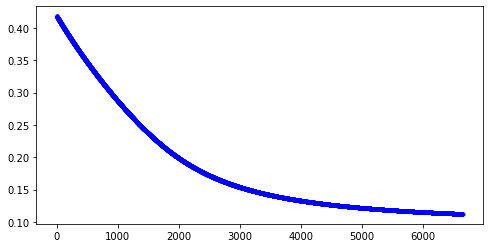

In [34]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(6658),c2,'b.')

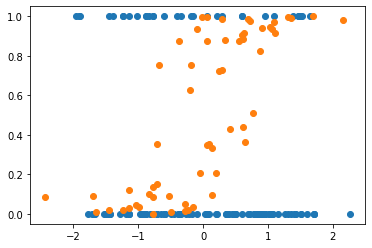

In [35]:
plt.figure()
plt.scatter(x=x_train[:,1],y= y_train2)          
plt.scatter(x=x_test[:,1], y=pred)
plt.show()

### MODELO GRADO 2

In [36]:
X2 = X_procesado ** 2
x_train2, x_test2 = train_test_split(X2, test_size=0.33)

t02, c02, ts02 = gradient_descent(
    x_train2, 
    y_train0,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.01, 
    threshold = 0.1, 
    max_iter = 1000
)

In [37]:
print("El minimo del descenso es: ", min(c02))

El minimo del descenso es:  0.12132101334826169


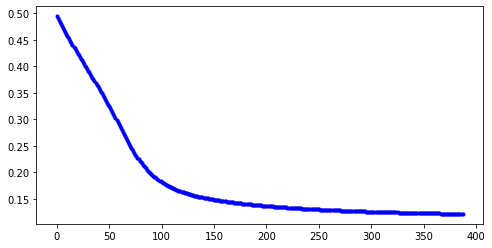

In [39]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(388),c02,'b.')

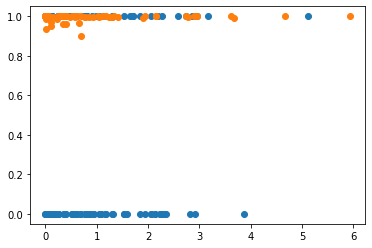

In [40]:
pred2 = sigmoid(x_test2 @ theta_0)

plt.figure()
plt.scatter(x=x_train2[:,1],y= y_train0)          
plt.scatter(x=x_test2[:,1], y=pred2)
plt.show()

### MODELO GRADO 3
#### CATEGORIA 1

In [41]:
X3 = X_procesado ** 3
x_train3, x_test3 = train_test_split(X3, test_size=0.33)

t03, c03, ts03 = gradient_descent(
    x_train3, 
    y_train0,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.01, 
    threshold = 0.1, 
    max_iter = 1000
)

In [42]:
print("El minimo del descenso es: ", min(c03))

El minimo del descenso es:  0.11736662469653954


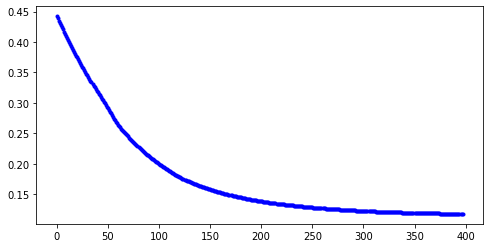

In [44]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(398),c03,'b.')

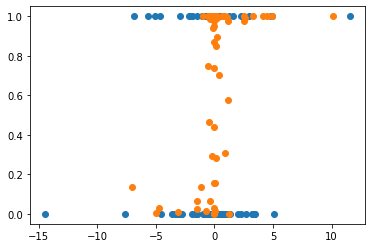

In [45]:
pred3 = sigmoid(x_test3 @ theta_0)

plt.figure()
plt.scatter(x=x_train3[:,1],y= y_train0)          
plt.scatter(x=x_test3[:,1], y=pred3)
plt.show()

#### CATEGORIA 2

In [46]:
t13, c13, ts13 = gradient_descent(
    x_train3, 
    y_train1,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.01, 
    threshold = 0.1, 
    max_iter = 1000
)

print("El minimo del descenso es: ", min(c13))

El minimo del descenso es:  0.11548139069321785


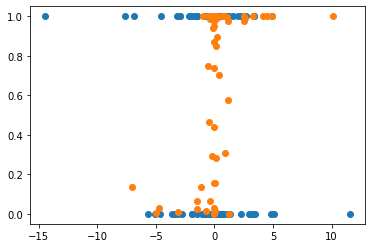

In [47]:
plt.figure()
plt.scatter(x=x_train3[:,1],y= y_train1)          
plt.scatter(x=x_test3[:,1], y=pred3)
plt.show()

#### CATEGORIA 3

In [48]:
t23, c23, ts23 = gradient_descent(
    x_train3, 
    y_train2,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.01, 
    threshold = 0.1, 
    max_iter = 1000
)

print("El minimo del descenso es: ", min(c23))

El minimo del descenso es:  0.09565733401562926


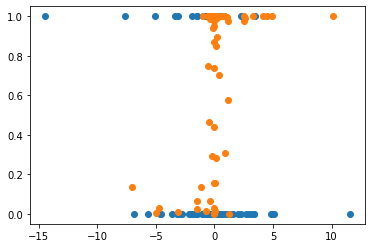

In [49]:
plt.figure()
plt.scatter(x=x_train3[:,1],y= y_train2)          
plt.scatter(x=x_test3[:,1], y=pred3)
plt.show()

### MODELO GRADO 5

In [50]:
X5 = X_procesado ** 5
x_train5, x_test5 = train_test_split(X5, test_size=0.33)

t05, c05, ts05 = gradient_descent(
    x_train5, 
    y_train0,
    theta_0,
    linear_cost, 
    linear_cost_gradient, 
    lmbd = 10,
    learning_rate = 0.01, 
    threshold = 0.1, 
    max_iter = 1000
)

In [51]:
print("El minimo del descenso es: ", min(c05))

El minimo del descenso es:  0.10502871036420504


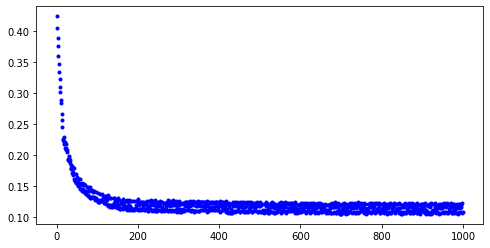

In [52]:
fig,ax = plt.subplots(figsize=(8,4))
_=ax.plot(range(1000),c05,'b.')

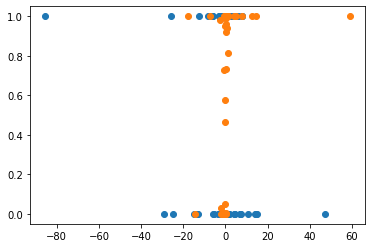

In [53]:
pred5 = sigmoid(x_test5 @ theta_0)

plt.figure()
plt.scatter(x=x_train5[:,1],y= y_train0)          
plt.scatter(x=x_test5[:,1], y=pred5)
plt.show()

### RESULTADOS

- El analisis de los tres tipos de vinosolo se realizo para los modelos de 2 grados (grado 1 y grado 3)
- Estos dos modelos logisticos fueron los mejores prediciendo el tipo de alcohol 
- El grado 2 convergia demasiado rapido y con un comportamiento anormal y el grado 5 ya estaba demasiado sesgado (por lo que solo se analizo un tipo de vino y se descartaron)

#### SELECCION DE MODELO
El mejor modelo fue el GRADO 3
Este alcanzo el descenso minimo de todos y el comportamiento de la nube de puntos era el mas similar a los datos del test set.